# Dataset Description:

The data is from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). Which has variables such as Age, Occupation, Sex, Education, Marital Status etc of a person and based on this attributes  we have to do the prediction task, determining whether a person makes over $50K a year. Therefore, our target variable here is Income. 

# Importing the Dataset:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('CensusIncome.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.shape

(32560, 15)

# Checking the Null Values:

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

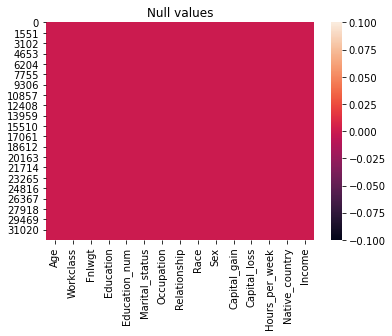

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There are no null present in the dataset.

In [9]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are columns with object type, so we will be encoding it.

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [11]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [12]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [13]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income            float64
dtype: object

# Describing the Dataset:

In [14]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Checking the Correlation with the Traget variable:

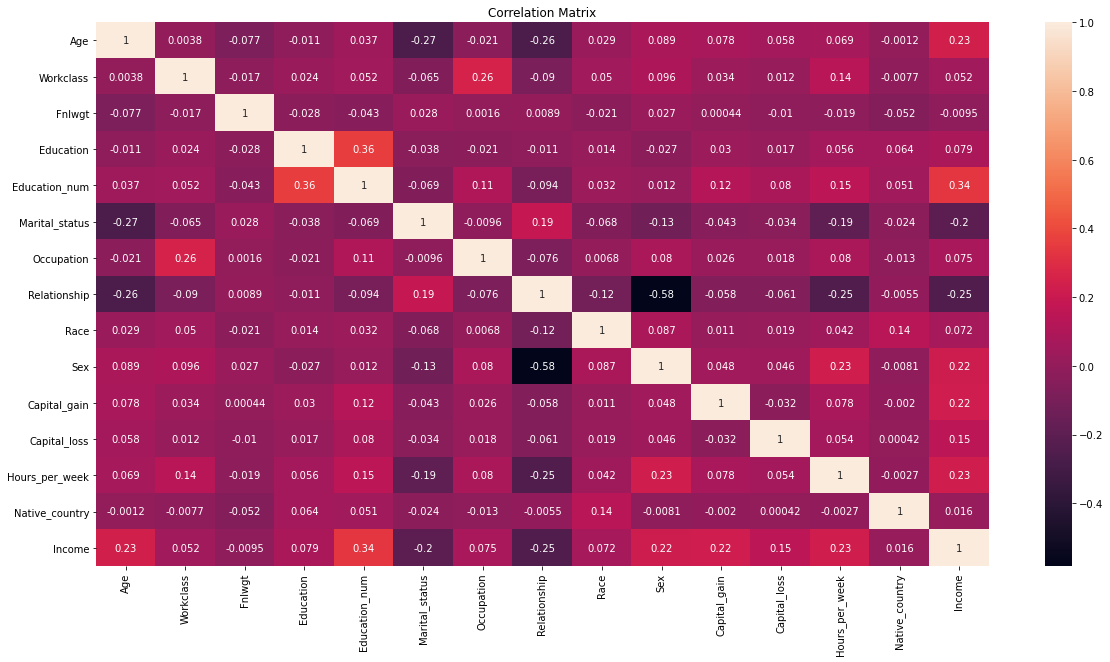

In [15]:
corr_mat=df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
corr_matrix=df.corr()
corr_matrix["Income"].sort_values(ascending=False) 

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

We can see that variable Education_num has max correlation with the target variable Income.

# Splitting the independent variable and target variable in x and y:

In [20]:
x= df.drop("Income",axis=1)
y= df["Income"]

# Checking the skewness:

In [21]:
x.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

There is skewness in the dataset. We will remove the skewness using power_transform function

In [22]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [23]:
df_new.skew()

Age              -0.013897
Workclass         0.061629
Fnlwgt            0.016914
Education        -0.309431
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.187152
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.725467
dtype: float64

# Checking Outliers:

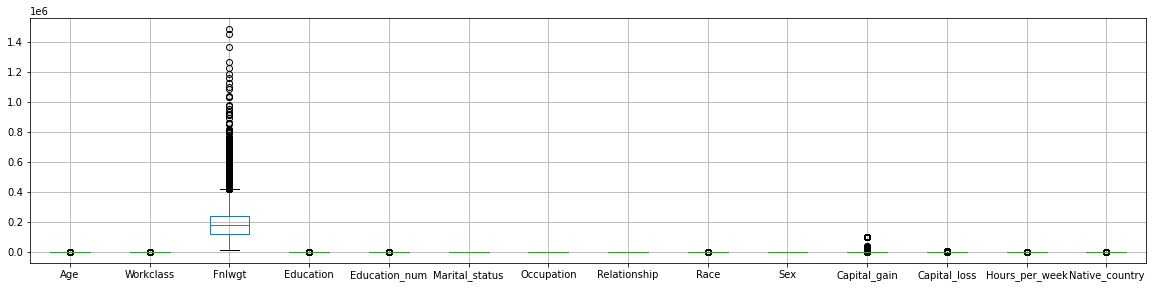

In [24]:
x.iloc[:,0:15].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

In [25]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [26]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


# Finding best random_state:

In [27]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.7917690417690417 on Random_state 1
Best accuracy is 0.7947379197379197 on Random_state 2
Best accuracy is 0.7994471744471745 on Random_state 3
Best accuracy is 0.8014946764946765 on Random_state 14
Best accuracy is 0.8029279279279279 on Random_state 49
Best accuracy is 0.8063063063063063 on Random_state 56
Best accuracy is 0.8067158067158067 on Random_state 103


We have found best random_state value as 56. We will create our train_test_split using the random_state(56)

# Creating train-test-split:

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=56)

In [29]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8063063063063063
[[7274  215]
 [1677  602]]
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      7489
         1.0       0.74      0.26      0.39      2279

    accuracy                           0.81      9768
   macro avg       0.77      0.62      0.64      9768
weighted avg       0.79      0.81      0.77      9768



In [30]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.810913185913186
[[6466 1023]
 [ 824 1455]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      7489
         1.0       0.59      0.64      0.61      2279

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.74      9768
weighted avg       0.82      0.81      0.81      9768



In [31]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8610769860769861
[[6955  534]
 [ 823 1456]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      7489
         1.0       0.73      0.64      0.68      2279

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



In [32]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

0.8004709254709255
[[7481    8]
 [1941  338]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      7489
         1.0       0.98      0.15      0.26      2279

    accuracy                           0.80      9768
   macro avg       0.89      0.57      0.57      9768
weighted avg       0.84      0.80      0.74      9768



We are getting highest accuracy with RandomForestClassifier (86%) but it can be due to overfitting also so we will check cross validation scores

In [33]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of LogisticRegression model : ",scr.mean())

Cross validation score of LogisticRegression model :  0.7925675675675675


In [34]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of DecisionTressClassifier model : ",scr.mean())

Cross validation score of DecisionTressClassifier model :  0.8078624078624079


In [35]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of RandomForestClassifier model : ",scr.mean())

Cross validation score of RandomForestClassifier model :  0.8567874692874693


In [36]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model : ",scr.mean())

Cross validation score of SVC model :  0.7952088452088452


# Hyper parameter tunning:

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters={'max_depth': np.arange(2, 15),
           'criterion':['gini','entropy']}

In [39]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [40]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [41]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [42]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [43]:
accuracy_score(y_test,GCV_pred)

0.8721334971334971

In [48]:
import joblib
joblib.dump(GCV.best_estimator_,"CensusIncomeModel.obj")

['CensusIncomeModel.obj']